# 1. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [11]:
# Reading the data
df = pd.read_csv("/Users/harshitsrivastava/Desktop/Drone attacks in Pakistan/PakistanSuicideAttacks.csv")

# Dropiing the Columns that are not required
df=df.drop(['Islamic Date', 'Holiday Type', 'Influencing Event/Event', 'Hospital Names', 'Time'], axis=1)

# Printing the number of missing values in the data
for col in df:
    print col, ": ", df[col].isnull().sum()

S# :  0
Date :  0
Blast Day Type :  11
City :  0
Latitude :  2
Longitude :  2
Province :  0
Location :  3
Location Category :  35
Location Sensitivity :  36
Open/Closed Space :  35
Target Type :  26
Targeted Sect if any :  49
Killed Min :  146
Killed Max :  16
Injured Min :  131
Injured Max :  33
No. of Suicide Blasts :  82
Explosive Weight (max) :  323
Temperature(C) :  5
Temperature(F) :  7


### 1.1 Replacing Null Values with 0

In [12]:
def filling_nan(data):
    
    col = ['Killed Min', 'Injured Min', 'Injured Max']
    
    data[col] = data[col].fillna(0)                                  # Filling the above columns with 0
    data['No. of Suicide Blasts'] = data['No. of Suicide Blasts'].fillna(1)
    return data

In [13]:
df = filling_nan(df)

# Printing the number of missing values in the data
for col in df:
    print col, ": ", df[col].isnull().sum()

S# :  0
Date :  0
Blast Day Type :  11
City :  0
Latitude :  2
Longitude :  2
Province :  0
Location :  3
Location Category :  35
Location Sensitivity :  36
Open/Closed Space :  35
Target Type :  26
Targeted Sect if any :  49
Killed Min :  0
Killed Max :  16
Injured Min :  0
Injured Max :  0
No. of Suicide Blasts :  0
Explosive Weight (max) :  323
Temperature(C) :  5
Temperature(F) :  7


### 1.2 Converting to date format

In [15]:
def dt(data):
    for i in range(0, 492):
        
        # Appending the Date and Time field to 'frame' and creating a new column based on the specified Date-time format
        data['Date'][i] =  datetime.strptime(data['Date'][i], '%A-%B %d-%Y')
    
    return data

In [16]:
s_data = dt(df)

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### 1.3 Marking no. of civilians killed and injured

In [17]:
# Taking average of Maximum and Minimum values 
s_data['Killed'] = (s_data['Killed Min'] + s_data['Killed Max'])/2
s_data['Killed'] = np.ceil(s_data['Killed'])
s_data['Injured'] = (s_data['Injured Min'] + s_data['Injured Max'])/2
s_data['Injured'] = np.ceil(s_data['Injured'])

In [20]:
s_data.head()

,S#,Date,Blast Day Type,City,Latitude,Longitude,Province,Location,Location Category,Location Sensitivity,...,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Temperature(C),Temperature(F),Killed,Injured
0,1,1995-11-19 00:00:00,Holiday,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,Foreign,High,...,14.0,15.0,0.0,60.0,2.0,NaN,15.835,60.503,15.0,30.0
1,2,2000-11-06 00:00:00,Working Day,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,Office Building,Low,...,0.0,3.0,0.0,3.0,1.0,NaN,23.770,74.786,2.0,2.0
2,3,2002-05-08 00:00:00,Working Day,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,Hotel,Medium,...,13.0,15.0,20.0,40.0,1.0,2.5 Kg,31.460,88.628,14.0,30.0
3,4,2002-06-14 00:00:00,Working Day,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,Foreign,High,...,0.0,12.0,0.0,51.0,1.0,NaN,31.430,88.574,6.0,26.0
4,5,2003-07-04 00:00:00,Working Day,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,Religious,Medium,...,44.0,47.0,0.0,65.0,1.0,NaN,33.120,91.616,46.0,33.0


### 1.4 Grouping the attacks by Year, Month and Day of Week

In [22]:
# Extracting Year, Month and Day of week from the given Date-Time format
s_data['Year'] = np.nan
s_data['Weekday'] = np.nan
s_data['Month'] = np.nan

for i in range(0, len(s_data.Year)):
    s_data.loc[:,'Year'][i]= s_data.loc[:,'Date'][i].year
    s_data.loc[:,'Weekday'][i] = s_data['Date'][i].weekday()
    s_data.loc[:,'Month'][i] = s_data['Date'][i].month
    
s_data['Year'] = s_data['Year'].astype("int")
s_data['Weekday'] = s_data['Weekday'].astype("int")

s_data_byyear = pd.DataFrame()

# Grouping the data by Year and corresponding Suicide Blast Statistics
s_data_byyear['No. of Suicide Blasts'] = s_data.groupby(['Year'])['No. of Suicide Blasts'].sum()
# Storing the average Civilians killed in an attack
s_data_byyear['Avg Civilians Killed'] = s_data.groupby(['Year'])['Killed'].mean()
# Storing the Total Civilians killed 
s_data_byyear['Killed'] = s_data.groupby(['Year'])['Killed'].sum()
# Storing the Total Civilians Injured 
s_data_byyear['Injured'] = s_data.groupby(['Year'])['Injured'].sum()
# Storing the Average no. of Civilians Killed in an attack 
s_data_byyear['Avg. Civ_killed'] = s_data.groupby(['Year'])['Killed'].mean()

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# 2. Eploratory Data Analysis

### 2.1.1 Suicide Bombing Attacks by Year

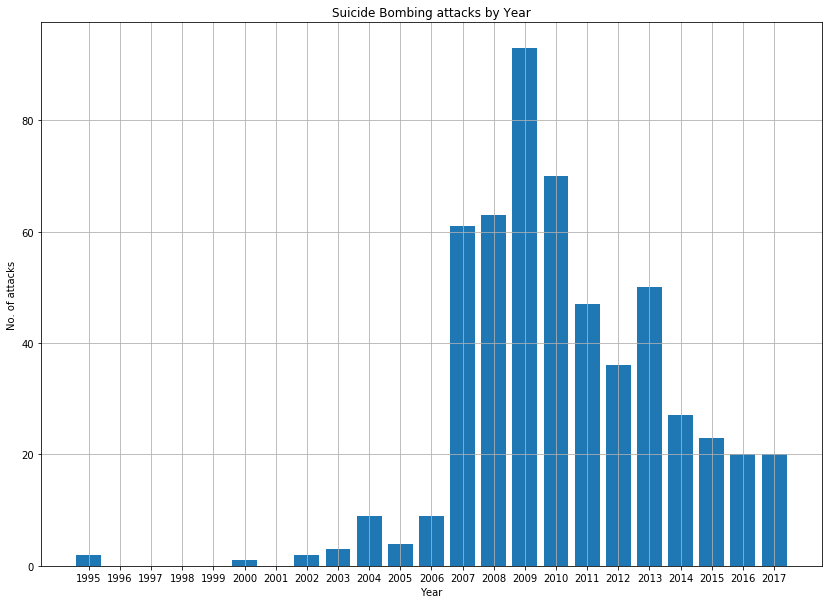

In [23]:
fig1 = plt.figure(figsize=(14, 10))
fig1 = plt.bar(left=list(s_data_byyear['No. of Suicide Blasts'].keys()), height=s_by_year.values)
plt.xlabel("Year")
plt.ylabel("No. of attacks")
plt.title("Suicide Bombing attacks by Year")
plt.xticks(range(1995, 2018))
plt.grid()
plt.show()

### 2.1.2 Suicide Bombing Attacks by Month

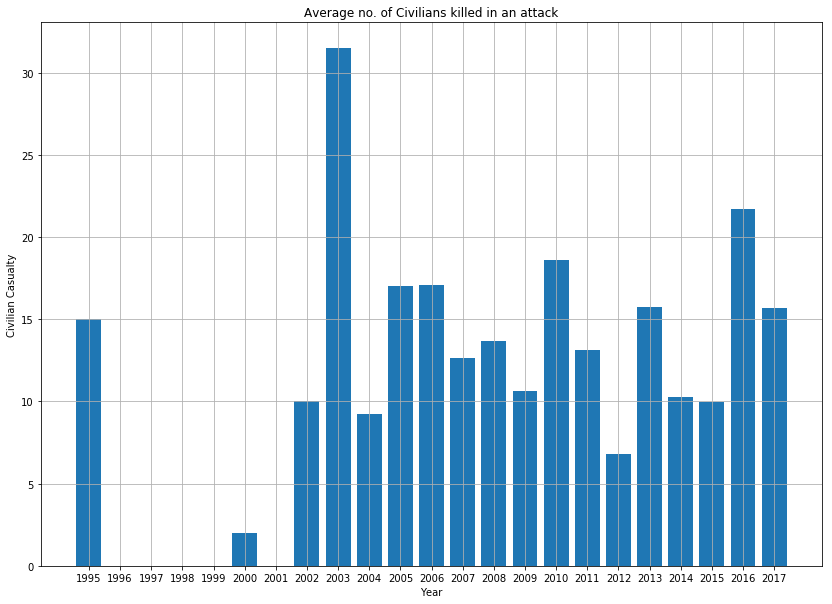

In [24]:
fig1 = plt.figure(figsize=(14, 10))
fig1 = plt.bar(left=list(s_data_byyear['Avg. Civ_killed'].keys()), height=s_by_avgciv.values)
plt.xlabel("Year")
plt.ylabel("Civilian Casualty")
plt.title("Average no. of Civilians killed in an attack")
plt.xticks(range(1995, 2018))
plt.grid()
plt.show()

### 2.2 Combining the Drone-attack data to visualize and compare the 2 Attacks

In [26]:
%store -r data_byyear

result = pd.merge(s_data_byyear, data_byyear, left_index=True, right_index=True)

### 2.2.1 Number of Civilians Killed by Each of the Strikes

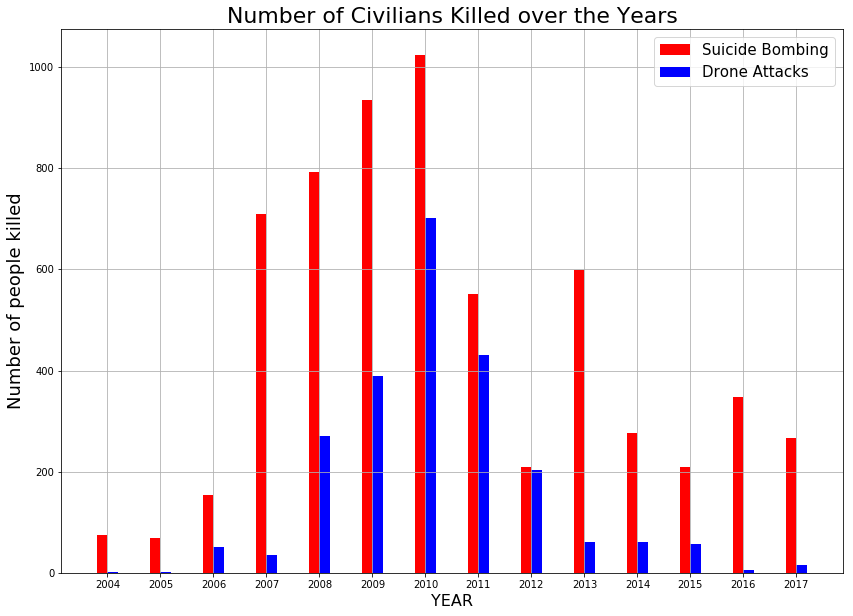

In [27]:
fig = plt.figure(figsize=(14, 10))

x = data_byyear.Innocents.keys()

plt.bar(x - 0.1, result['Killed'], width=0.2, color='r',align='center', label = 'Suicide Bombing')
plt.bar(x + 0.1, result['Innocents'],width=0.2,color='b',align='center', label = 'Drone Attacks')
#plt.ylim(ymin=0)
plt.xticks(range(2004, 2018))
plt.xlabel("YEAR", fontsize = 16)
plt.ylabel("Number of people killed", fontsize = 18)
plt.title("Number of Civilians Killed over the Years", fontsize = 22)
plt.legend(fontsize = 15)
plt.grid()
plt.show()

### 2.2.2 Comparing the Terrorists killed by Drone Strikes and Civilians killed by Suicide Bombings

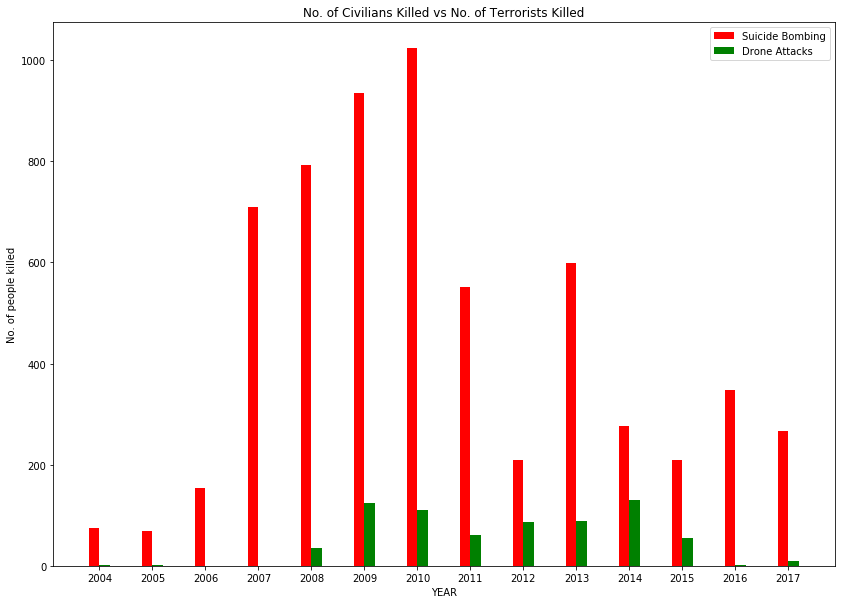

In [28]:
fig = plt.figure(figsize=(14, 10))

x = result.Terrorists.keys()

plt.bar(x - 0.1, result['Killed'], width=0.2, color='r',align='center', label = 'Suicide Bombing')
plt.bar(x + 0.1, result['Terrorists'],width=0.2,color='g',align='center', label = 'Drone Attacks')
#plt.ylim(ymin=0)
plt.xticks(range(2004, 2018))
plt.xlabel("YEAR")
plt.ylabel("No. of people killed")
plt.title("No. of Civilians Killed vs No. of Terrorists Killed")
plt.legend()
plt.show()

### 2.2.3 Comparing Civilian Deaths cause by both Attacks

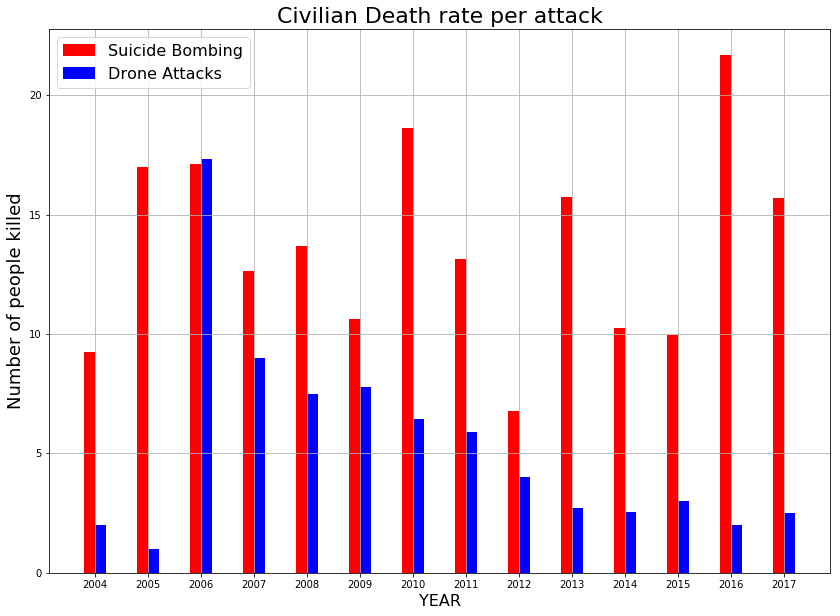

In [29]:
fig = plt.figure(figsize=(14, 10))

x = result.Terrorists.keys()

plt.bar(x - 0.1, result['Avg Civilians Killed'], width=0.2, color='r',align='center', label = 'Suicide Bombing')
plt.bar(x + 0.1, result['Avg Innocents Killed'],width=0.2,color='b',align='center', label = 'Drone Attacks')
#plt.ylim(ymin=0)
plt.xticks(range(2004, 2018))
plt.xlabel("YEAR", fontsize = 16)
plt.ylabel("Number of people killed", fontsize = 18)
plt.title("Civilian Death rate per attack", fontsize = 22)
plt.legend( fontsize = 16)
plt.grid()
plt.show()